In [1]:
from __future__ import print_function
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import librosa
import librosa.display
import os

# import seaborn
import scipy, sklearn
import IPython.display

%matplotlib inline

plt.rcParams['figure.figsize'] = (14, 5)

In [2]:
filename_choir = 'choir.mp3'
    

In [3]:
x_choir, fs_choir = librosa.load(filename_choir, duration=5)


In [4]:
IPython.display.Audio(x_choir, rate=fs_choir)

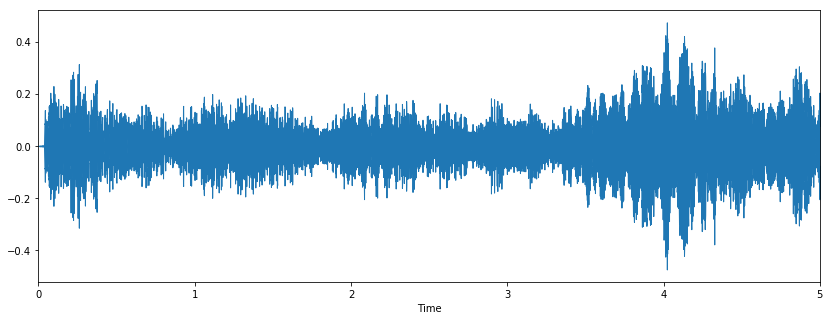

In [5]:
librosa.display.waveplot(x_choir, fs_choir)

In [6]:
S_choir = librosa.feature.melspectrogram(x_choir, fs_choir)

In [7]:
S_log_choir = librosa.logamplitude(S_choir)

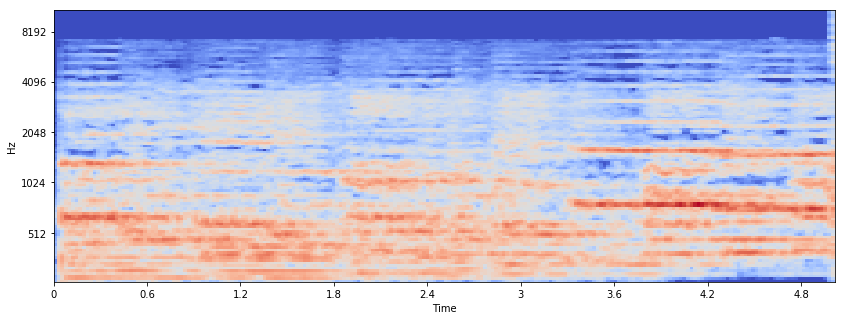

In [8]:
librosa.display.specshow(S_log_choir, sr=fs_choir, x_axis='time', y_axis='mel')

In [9]:
n_mfcc = 12
mfcc_choir = librosa.feature.mfcc(x_choir, sr=fs_choir, n_mfcc=n_mfcc).T

In [10]:
mfcc_choir.shape

(216, 12)

In [11]:
scaler = sklearn.preprocessing.StandardScaler()

In [12]:
mfcc_choir_scaled = scaler.fit_transform(mfcc_choir)


In [13]:
mfcc_choir_scaled.mean(axis=0)

array([ -6.86693500e-16,   6.25014443e-16,  -1.31581988e-16,
        -2.30268479e-16,   0.00000000e+00,   2.79611725e-16,
        -6.57909941e-17,   0.00000000e+00,   4.11193713e-16,
         0.00000000e+00,  -3.28954970e-17,  -6.57909941e-17])

In [14]:
mfcc_choir_scaled.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [15]:
filename_clavier = 'clavier.mp3'

In [16]:
x_clavier, fs_clavier = librosa.load(filename_clavier, duration=5)

In [17]:
IPython.display.Audio(x_clavier, rate=fs_clavier)

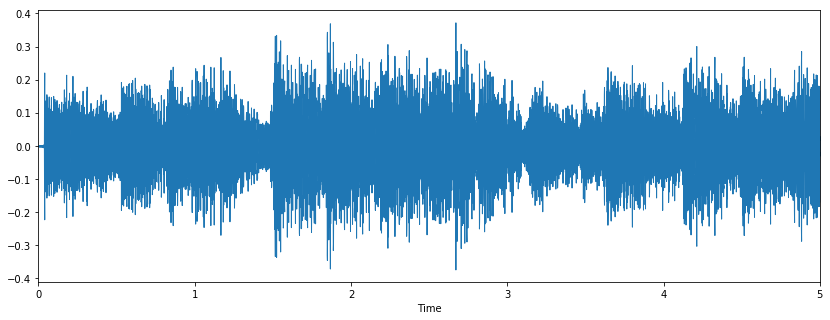

In [18]:
librosa.display.waveplot(x_clavier, fs_clavier)

In [19]:
S_clavier = librosa.feature.melspectrogram(x_clavier, fs_clavier)

In [20]:
S_log_clavier = librosa.logamplitude(S_clavier)

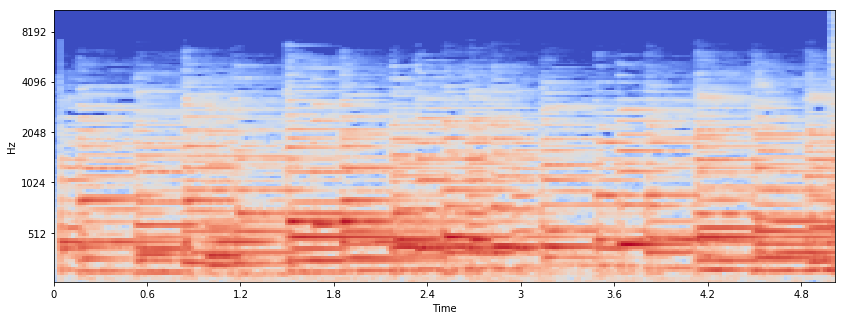

In [21]:
librosa.display.specshow(S_log_clavier, sr=fs_clavier, x_axis='time', y_axis='mel')

In [22]:
mfcc_clavier = librosa.feature.mfcc(x_clavier, sr=fs_clavier, n_mfcc=n_mfcc).T

In [23]:
mfcc_clavier.shape

(216, 12)

In [24]:
mfcc_clavier_scaled = scaler.transform(mfcc_clavier)

In [25]:
mfcc_clavier_scaled.mean(axis=0)

array([-0.76493193,  3.54253226, -0.56831906, -0.02727853,  1.19049952,
        0.43889801, -0.04283008, -1.41345601,  1.12003032, -0.9784725 ,
       -0.98326202,  0.43889978])

In [26]:
mfcc_clavier_scaled.std(axis=0)

array([ 1.285537  ,  0.81748666,  0.77316429,  0.53794119,  0.48424067,
        0.86466803,  0.614552  ,  0.72699874,  0.53934159,  0.59684869,
        0.85549216,  0.50436933])

In [27]:
features = np.vstack((mfcc_choir_scaled, mfcc_clavier_scaled))

In [28]:
num_choir = len(mfcc_choir_scaled)
num_clavier = len(mfcc_clavier_scaled)

In [48]:
label_one_hot_choir = np.stack((np.zeros(num_choir), np.ones(num_choir)), axis = -1)
label_one_hot_clavier = np.stack((np.ones(num_clavier), np.zeros(num_clavier)), axis = -1)

In [49]:
labels_one_hot = np.concatenate((label_one_hot_choir, label_one_hot_clavier))


In [50]:
labels_one_hot

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,

In [51]:
labels_one_hot.shape


(432, 2)

In [34]:
x_choir_test, fs_choir = librosa.load(filename_choir, duration=10, offset=10)

In [35]:
x_clavier_test, fs_clavier = librosa.load(filename_clavier, duration=10, offset=10)

In [36]:
mfcc_choir_test = librosa.feature.mfcc(x_choir_test, sr=fs_choir, n_mfcc=n_mfcc).T

In [37]:
mfcc_clavier_test = librosa.feature.mfcc(x_clavier_test, sr=fs_clavier, n_mfcc=n_mfcc).T

In [38]:
mfcc_choir_test_scaled = scaler.transform(mfcc_choir_test)

In [39]:
mfcc_clavier_test_scaled = scaler.transform(mfcc_clavier_test)

In [40]:
features_test = np.vstack((mfcc_choir_test_scaled, mfcc_clavier_test_scaled))

In [41]:
labels_test = np.concatenate((np.zeros(len(mfcc_choir_test)), np.ones(len(mfcc_clavier_test))))

In [42]:
num_choir_test = len(mfcc_choir_test_scaled)
num_clavier_test = len(mfcc_clavier_test_scaled)

In [52]:
label_one_hot_choir_test = np.stack((np.zeros(num_choir_test), np.ones(num_choir_test)), axis = -1)
label_one_hot_clavier_test = np.stack((np.ones(num_clavier_test), np.zeros(num_clavier_test)), axis = -1)

In [53]:
labels_one_hot_test = np.concatenate((label_one_hot_choir_test, label_one_hot_clavier_test))


In [54]:
import tensorflow as tf

In [55]:
features.shape

(432, 12)

In [56]:
labels_one_hot.shape

(432, 2)

In [57]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [62]:
W = tf.Variable(tf.random_uniform([12, 2], -1., 1.))

In [63]:
b = tf.Variable(tf.zeros([2]))

In [64]:
h = tf.add(tf.matmul(X, W), b)

In [65]:
a = tf.nn.relu(h)

In [66]:
nn_model = tf.nn.softmax(a)

In [67]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(nn_model), axis=1))

In [68]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [69]:
train_op = optimizer.minimize(cost)

In [70]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [71]:
labels_one_hot.shape


(432, 2)

In [73]:
for step in range(1000):
    sess.run(train_op, feed_dict={X: features, Y: labels_one_hot})

    if (step + 1) % 10 == 0:
        print('Step: {} | Loss: {}'.format(step + 1, sess.run(cost, feed_dict={X: features, Y: labels_one_hot})))


Step: 10 | Loss: 0.7994318604469299
Step: 20 | Loss: 0.7728055119514465
Step: 30 | Loss: 0.7561513185501099
Step: 40 | Loss: 0.7425386905670166
Step: 50 | Loss: 0.7304143309593201
Step: 60 | Loss: 0.7186298370361328
Step: 70 | Loss: 0.7075589299201965
Step: 80 | Loss: 0.6965999007225037
Step: 90 | Loss: 0.6849796772003174
Step: 100 | Loss: 0.6728172898292542
Step: 110 | Loss: 0.6595680713653564
Step: 120 | Loss: 0.6458545327186584
Step: 130 | Loss: 0.632120668888092
Step: 140 | Loss: 0.6167975664138794
Step: 150 | Loss: 0.5995002388954163
Step: 160 | Loss: 0.5799366235733032
Step: 170 | Loss: 0.5583493113517761
Step: 180 | Loss: 0.5369908809661865
Step: 190 | Loss: 0.5148626565933228
Step: 200 | Loss: 0.4944745898246765
Step: 210 | Loss: 0.4766560196876526
Step: 220 | Loss: 0.46112388372421265
Step: 230 | Loss: 0.4475330710411072
Step: 240 | Loss: 0.4354047477245331
Step: 250 | Loss: 0.42451056838035583
Step: 260 | Loss: 0.41415292024612427
Step: 270 | Loss: 0.4045535624027252
Step: 28

In [74]:
prediction = tf.argmax(nn_model, 1)
target = tf.argmax(Y, 1)
print('<Predicted output>\n', sess.run(prediction, feed_dict={X: features_test}))
# print('<True label>\n', sess.run(target, feed_dict={Y: labels_one_hot_test}))

is_correct = tf.equal(prediction, target)
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('Test Accuracy: %.2f' % sess.run(accuracy * 100, feed_dict={X: features_test, Y: labels_one_hot_test}))

<Predicted output>
 [1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 